###   Метод Монте Карло

####  Экспериментальная вероятность


In [4]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#  выбор темы картинок на Ваш вкус. Необязательная строчка.
#  matplotlib.style.use('ggplot')
#  Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline


In [5]:
import random


In [ ]:
#  Это Питон...

#  random.randint(A, B)
#  случайное целое число  A ≤ N ≤ B     !!!!!!



In [9]:
#  Задача 1.0

# Кидаются 3 игральные кости - (К)расная, (Б)елая и (Ч)ерная.
# Найти вероятность того, что К+Б<=2*Ч


#  Задаем зерно датчика  a, 
#  опция version=2 требует преобразовать а в целое число, если требуется
random.seed(a=42, version=2)


#  Число экспериментов
n_exp = 100000

#  пространство элементарных событий
A = list(range(1,7))

#  Обнуляем счетчик числа благоприятных событий
k_success=0

#  n_exp испытаний,  бросаем три кубика
for i in range(n_exp):
    #    3 броска кубика   Выборка с возвращением
    dice = random.choices(A, k=3)
        
    #  Исход благоприятный?
    if dice[0] + dice[1] <= 2*dice[2]:
        k_success += 1

print('Вероятность К+Б<=2*Ч равна', np.round(k_success/n_exp, 2))


Вероятность К+Б<=2*Ч равна 0.54


In [10]:
#  Задача 1.1  :

# Кидаются 3 игральные кости - (К)расная, (Б)елая и (Ч)ерная.
# Найти вероятность того, что К+Б<=2*Ч

#  Подсчитаем точный ответ

#  Число исходов
m=0
#  Число благоприятных исходов
k=0

for i_red in range(1, 7):
    for i_white in range(1, 7):
        for i_black in range(1, 7):
            if i_red + i_white <= 2 * i_black:
                k += 1
            m += 1

print(k/m)


0.5416666666666666


In [22]:
#  Задача 1.2    Решение с картинками
#  Сколько должно быть экспериментов?

# Кидаются 3 игральные кости - (К)расная, (Б)елая и (Ч)ерная.
# Найти вероятность того, что К+Б <= 2*Ч


#  Задаем зерно датчика  a, 
#  опция version=2 требует преобразовать а в целое число, если требуется
random.seed(a=42, version=2)

#  Число экспериментов
n_exp = 1000000

#  пространство элементарных событий
A = list(range(1,7))

#  Обнуляем счетчик числа благоприятных событий
k_success=0

prob_tmp = []

#  n_exp испытаний,  бросаем три кубика
for i in range(n_exp):
    #    3 броска кубика   Выборка с возвращением
    dice = random.choices(A, k=3)
        
    #  Исход благоприятный?
    if dice[0] + dice[1] <= 2*dice[2]:
        k_success += 1

    prob_tmp.append(k_success/(i+1))
        
        
print('Вероятность К+Б<=2*Ч равна', np.round(k_success/n_exp, 4))




Вероятность К+Б<=2*Ч равна 0.5418


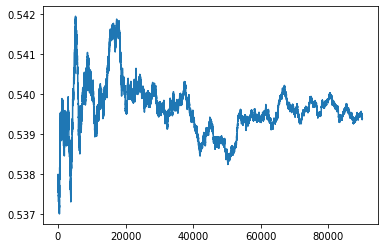

In [15]:
#  plt.plot(prob_tmp)

plt.plot(prob_tmp[10000 : 100000])

#  plt.plot(prob_tmp[60000 : 80000])


#  plt.plot(prob_tmp[ : 1000])

#  plt.plot(prob_tmp[800 : 1000])




In [3]:
# Задача  2

# Найти вероятность того, что среди наугад вытащенных 5 карт из колоды в 52
# будет 5 карт одной масти (Флеш).


#  Задаем зерно датчика a, 
#  опция version=2 требует преобразовать а в целое число, если требуется
random.seed(a=12345, version=2)

# Число экспериментов
n_exp = 10000


p_0 = 1          #   Вероятность, полученная на предыдущей попытке
delta_ = 1.1     #   

#   Колода карт, важна только масть
deck = ["s"] * 13 + ["h"] * 13 + ["d"] * 13 + ["c"] * 13 

while delta_ >= 0.00001:

#  Обнуляем счетчик
    count_ = 0

    for i in range(n_exp):             # Проводим n_exp экспериментов
        a = random.sample(deck, 5)     # Выбираем 5 карт без возвращения

#   Индийский код
        if a.count("s") == 5:
            count_ += 1
        if a.count("h") == 5:
            count_ += 1
        if a.count("d") == 5:
            count_ += 1
        if a.count("c") == 5:
            count_ += 1

#    1-е улучшение          
#        if a.count("s") == 5 or a.count("h") == 5 or a.count("d") == 5 or a.count("c") == 5:
#            count_ += 1


#    2-е улучшение       
#    deck = [1] * 13 + [10] * 13 + [100] * 13 + [1000] * 13 
#    число deck содержит цифру 5?

    p= count_/n_exp              # Оцениваем вероятность
    delta_ = abs(p - p_0)        # Считаем изменение вероятности
    p_0 = p                      # Новая оценка вероятности заменяет старую
    n_exp = round(n_exp * 1.1)   # Увеличиваем число экспериментов

print(n_exp)
print(p)

67280
0.0018801909620037931


In [72]:
#  Правильный ответ - вычисляем  тремя способами


import scipy.special

# the two give the same results 
print(scipy.special.binom(13,5) * 4 / scipy.special.binom(52, 5))

print(scipy.special.comb(13,5) * 4 / scipy.special.comb(52, 5))

print(13*12*11*10*9/52/51/50/49/48*4)

0.0019807923169267707
0.0019807923169267707


In [ ]:
# Задача 3
# Найти вероятность того, что точка, наугад брошенная в круг, 
# попадет в квадрат, который вписан в этот круг



In [13]:
# Число экспериментов
n_exp = 1000000

m=0  #  Число точек, попавших в круг
k=0  #  Число точек, попавших в квадрат


#  Задаем зерно датчика a 
#  version=2 требует преобразовать а в целое число, если требуется
random.seed(a=12345, version=2)


for i in range(n_exp):             # Проводим n_exp экспериментов
    a = np.random.uniform(0.0, 1.0, 2)     # Бросаем точку в квадрат [0,1]*[0,1]
    if (a[0]-0.5)**2 + (a[1]-0.5)**2 < 0.25:
        m += 1
        if abs(a[0] - 0.5) < 1/(2 * np.sqrt(2.0)) and abs(a[1] - 0.5) < 1/(2 * np.sqrt(2.0)):
            k += 1

print("Приближенный ответ после ", m, "экспериментов ", k/m)

print("Точный ответ ", 2.0/np.pi)

#  Как улучшить?
#  Расположить центр круга в начале координат

#  Вопрос.
#  Что изменится, если диаметр круга не равен 1?


Приближенный ответ после  785182 экспериментов  0.6363097982378608
Точный ответ  0.6366197723675814
